In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
data=pd.read_csv("DATASET_Preprocessed.csv")
data

,Unnamed: 0,tweet,label
0,0,a a woman you should not complain about cleani...,2
1,1,boy dat cold tyga dwn bad for cuffin dat hoe i...,1
2,2,dawg you ever fuck a bitch and she sta to cry ...,1
3,3,she look like a tranny,1
4,4,the shit you hear about me might be true or it...,1
...,...,...,...
50501,50501,get this worse than scum out of our country bu...,0
50502,50502,let this hoe touch this kid i swear to fucking...,0
50503,50503,that is what happens when illegal alien have a...,0
50504,50504,stopimmigration,0


In [3]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data

,tweet,label
0,a a woman you should not complain about cleani...,2
1,boy dat cold tyga dwn bad for cuffin dat hoe i...,1
2,dawg you ever fuck a bitch and she sta to cry ...,1
3,she look like a tranny,1
4,the shit you hear about me might be true or it...,1
...,...,...
50501,get this worse than scum out of our country bu...,0
50502,let this hoe touch this kid i swear to fucking...,0
50503,that is what happens when illegal alien have a...,0
50504,stopimmigration,0


In [4]:
data.dropna(inplace=True)
data

,tweet,label
0,a a woman you should not complain about cleani...,2
1,boy dat cold tyga dwn bad for cuffin dat hoe i...,1
2,dawg you ever fuck a bitch and she sta to cry ...,1
3,she look like a tranny,1
4,the shit you hear about me might be true or it...,1
...,...,...
50501,get this worse than scum out of our country bu...,0
50502,let this hoe touch this kid i swear to fucking...,0
50503,that is what happens when illegal alien have a...,0
50504,stopimmigration,0


In [6]:
data.label.value_counts()

1    26531
2    13651
0     8160
3     2114
Name: label, dtype: int64

In [20]:
data.to_csv("new_merged_preprocessed_data.csv")

In [7]:
y=data['label']
x=data['tweet']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)


print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(37842,) (37842,)
(12614,) (12614,)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB


In [11]:

#fitting tfidf vectorizer for set 
vectorizer_tfidf1 = TfidfVectorizer(min_df=1,ngram_range=(1,4))
vectorizer_tfidf1.fit(X_train.values) 


X_train_tweet_tfidf = vectorizer_tfidf1.transform(X_train.values)

X_test_tweet_tfidf = vectorizer_tfidf1.transform(X_test.values)

print("After TFIDF vectorizations")
print(X_train_tweet_tfidf.shape, y_train.shape)

print(X_test_tweet_tfidf.shape, y_test.shape)
print("="*100)

After TFIDF vectorizations
(37842, 1088097) (37842,)
(12614, 1088097) (12614,)


In [12]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [13]:
def train_test_model(model, X_train, X_test, y_train, y_test,labels):
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print("="*80)
    print('Start testing...', end='')
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    metrics_report = classification_report(y_test, predictions, target_names=labels)
    precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
    print('done!')
    print("="*80)
    return predictions, accuracy, metrics_report, (precision, recall, fscore)

In [14]:
labels_=['hatefull','offensive','neither','Tobacco']

Start training...done!
Start testing...done!
accuracy: 0.7722371967654986
              precision    recall  f1-score   support

    hatefull       0.71      0.55      0.62      2040
   offensive       0.80      0.84      0.82      6633
     neither       0.72      0.78      0.75      3413
     Tobacco       0.98      0.76      0.85       528

    accuracy                           0.77     12614
   macro avg       0.80      0.73      0.76     12614
weighted avg       0.77      0.77      0.77     12614



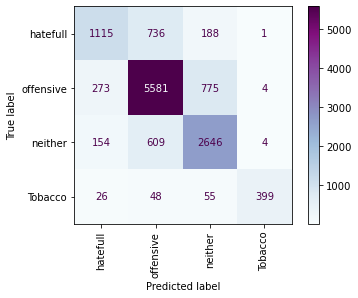

In [15]:
log_model=LogisticRegression(penalty='l2',max_iter=1000)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_train_tweet_tfidf, X_test_tweet_tfidf, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(log_model, X_test_tweet_tfidf, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
accuracy: 0.7735056286665609
              precision    recall  f1-score   support

    hatefull       0.62      0.64      0.63      2040
   offensive       0.85      0.78      0.81      6633
     neither       0.71      0.81      0.76      3413
     Tobacco       0.97      0.96      0.96       528

    accuracy                           0.77     12614
   macro avg       0.79      0.80      0.79     12614
weighted avg       0.78      0.77      0.78     12614



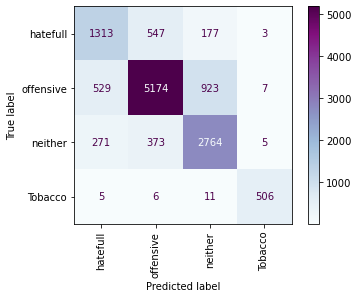

In [16]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_train_tweet_tfidf, X_test_tweet_tfidf, y_train, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(svm, X_test_tweet_tfidf, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
accuracy: 0.5553353416838434
              precision    recall  f1-score   support

    hatefull       1.00      0.06      0.11      2040
   offensive       0.54      0.98      0.70      6633
     neither       0.71      0.11      0.18      3413
     Tobacco       1.00      0.02      0.04       528

    accuracy                           0.56     12614
   macro avg       0.81      0.29      0.26     12614
weighted avg       0.68      0.56      0.44     12614



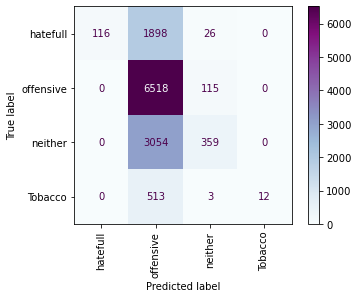

In [17]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0)

predictions, accuracy, metrics_report, rf_prf = train_test_model(rf_model, X_train_tweet_tfidf, X_test_tweet_tfidf, y_train, y_test, labels_)

print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(rf_model, X_test_tweet_tfidf, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

# Upsampling Technique-SMOTE

In [18]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')

X_tr,Y_tr=smote.fit_resample(X_train_tweet_tfidf,y_train)
print(X_tr.shape)
print(Y_tr.shape)
ccounter=Counter(Y_tr)
print(ccounter)

(79592, 1088097)
(79592,)
Counter({2: 19898, 0: 19898, 1: 19898, 3: 19898})


Start training...done!
Start testing...done!
accuracy: 0.767480577136515
              precision    recall  f1-score   support

    hatefull       0.64      0.56      0.60      2040
   offensive       0.83      0.79      0.81      6633
     neither       0.70      0.82      0.75      3413
     Tobacco       0.97      0.95      0.96       528

    accuracy                           0.77     12614
   macro avg       0.78      0.78      0.78     12614
weighted avg       0.77      0.77      0.77     12614



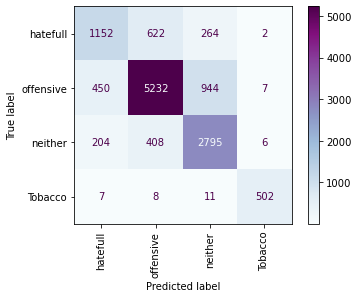

In [19]:
log_model=LogisticRegression(penalty='l2',max_iter=1000)
predictions, accuracy, metrics_report, log_prf = train_test_model(log_model, X_tr, X_test_tweet_tfidf, Y_tr, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(log_model, X_test_tweet_tfidf, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
accuracy: 0.7625654035198985
              precision    recall  f1-score   support

    hatefull       0.63      0.58      0.61      2040
   offensive       0.84      0.77      0.80      6633
     neither       0.68      0.82      0.74      3413
     Tobacco       0.96      0.96      0.96       528

    accuracy                           0.76     12614
   macro avg       0.78      0.78      0.78     12614
weighted avg       0.77      0.76      0.76     12614



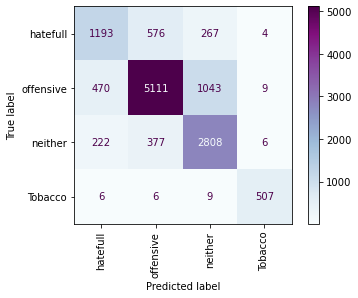

In [20]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, X_tr, X_test_tweet_tfidf, Y_tr, y_test, labels_)


print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)

plot_confusion_matrix(svm, X_test_tweet_tfidf, y_test, display_labels=labels_, xticks_rotation='vertical', cmap="BuPu")